In [1]:
from drugbank import *

In [2]:
xml_file = "drugbank_partial_and_generated.xml"
namespace = {"ns": "http://www.drugbank.ca"}

# 1) 
Utworzyć ramkę danych, która dla każdego leku zawiera następujące informacje: unikalny
identyfikator leku w bazie DrugBank, nazwę leku, jego typ, opis, postać w jakiej dany lek
występuje, wskazania, mechanizm działania oraz informacje z jakimi pokarmami dany lek
wchodzi w interakcje. (4 pkt)

In [3]:
drugs_df = extract_drug_info(xml_file, namespace)

In [4]:
drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   drugbank-id          20000 non-null  object
 1   name                 20000 non-null  object
 2   type                 20000 non-null  object
 3   description          20000 non-null  object
 4   state                20000 non-null  object
 5   indication           20000 non-null  object
 6   mechanism-of-action  20000 non-null  object
 7   food-interactions    5824 non-null   object
dtypes: object(8)
memory usage: 1.2+ MB


In [5]:
drugs_df.tail(10)

,drugbank-id,name,type,description,state,indication,mechanism-of-action,food-interactions
19990,19890,Abarelix,small molecule,Abciximab is a Fab fragment of the chimeric hu...,solid,"For the treatment of dwarfism, prevention of H...",Pancrelipase is used to replace the deficiency...,None
19991,19891,Interferon alfa-2b,biotech,Recombinant human coagulation Factor VIIa (rFV...,liquid,For the treatment of female infertility,Dornase alfa is a biosynthetic form of human D...,None
19992,19892,Asparaginase Escherichia coli,biotech,Urofollitropin is a urinary-derived follicle-s...,liquid,For prevention of renal transplant rejection,Alteplase is a recombinant tissue plasminogen ...,None
19993,19893,Etanercept,biotech,Neurotoxin produced by fermentation of clostri...,liquid,For the treatment of acute evolving transmural...,"Insulin binds to the insulin receptor (IR), a ...",None
19994,19894,Tenecteplase,biotech,"Human tissue plasminogen activator, purified, ...",solid,The use of pancrelipase amylase is part of the...,Imiglucerase catalyzes the hydrolysis of the g...,None
19995,19895,Gemtuzumab ozogamicin,biotech,"A synthetic nonapeptide comprising cysteinyl, ...",liquid,Lepirudin is indicated for anticoagulation in ...,Alteplase is a recombinant tissue plasminogen ...,None
19996,19896,Pegaspargase,small molecule,A recombinant chimeric (murine/human) monoclon...,liquid,For the intralesional treatment of refractory ...,Palifermin has been shown to protect oral and ...,None
19997,19897,Pegaspargase,biotech,Sargramostim is a human recombinant granulocyt...,liquid,Peginterferon alfa-2b is indicated for the tre...,Glucagon binds to the glucagon receptor activa...,Drink plenty of fluids.\n\nTake with fluids.\n...
19998,19898,Tenecteplase,biotech,Peginterferon alfa-2a is a form of recombinant...,liquid,For prophylactic treatment of Lyme Disease,Glucagon binds to the glucagon receptor activa...,Avoid herbs and supplements with anticoagulant...
19999,19899,Erythropoietin,biotech,"Human Insulin, also known as Regular Insulin, ...",liquid,For the adjuvant treatment of HER2-overexpress...,Mylotarg is directed against the CD33 antigen ...,Avoid herbs and supplements with anticoagulant...


# 2) 
Utworzyć ramkę danych pozwalającą na wyszukiwanie po DrugBank ID informacji o
wszystkich synonimach pod jakimi dany lek występuje. Napisać funkcję, która dla podanego
DrugBank ID utworzy i wyrysuje graf synonimów za pomocą biblioteki NetworkX. Należy
zadbać o czytelność generowanego rysunku. (4 pkt)

In [6]:
synonyms_df = extract_synonyms(xml_file, namespace)

In [7]:
synonyms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117384 entries, 0 to 117383
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   drugbank-id  117384 non-null  object
 1   synonym      117384 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [8]:
synonyms_df.tail(10)

,drugbank-id,synonym
117374,19896,Oxytocin
117375,19897,Digitalis antitoxin
117376,19897,"Digoxin Immune Fab, Ovine"
117377,19897,Digoxin-specific Antibody Fragments
117378,19897,Ovine digoxin immune fab
117379,19898,Rasburicasa
117380,19898,Rasburicase
117381,19898,Recombinant urate oxidase
117382,19898,Urate oxidase
117383,19899,Tositumomab


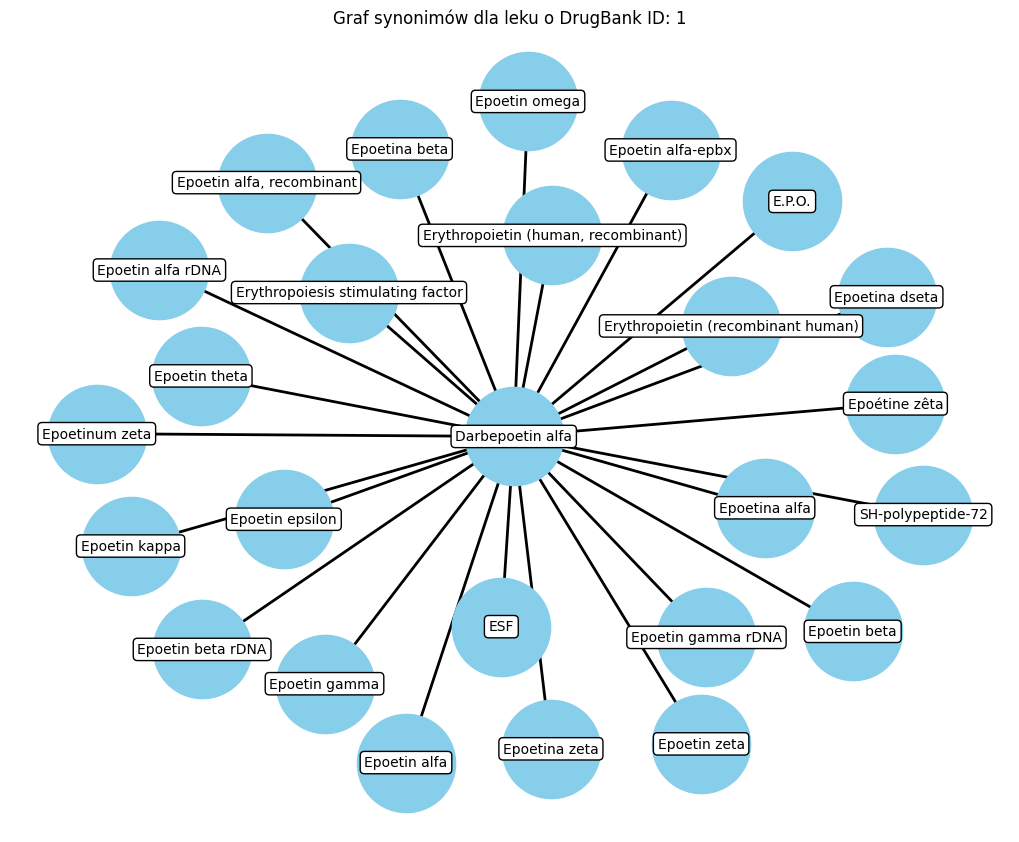

In [9]:
create_synonym_graph("1", drugs_df, synonyms_df)

# 3)
Utworzyć ramkę danych o produktach farmaceutycznych zawierających dany lek
(substancję leczniczą). Ramka powinna zawierać informacje o ID leku, nazwie produktu,
producencie, kod w narodowym rejestrze USA (ang. *National Drug Code*), postać w jakiej
produkt występuje, sposób aplikacji, informacje o dawce, kraju i agencji rejestrującej
produkt. (4 pkt)

In [10]:
products_info = extract_drug_products(xml_file, namespace)

In [11]:
products_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933307 entries, 0 to 933306
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   drugbank-id   933307 non-null  object
 1   drug-name     933307 non-null  object
 2   product-name  933307 non-null  object
 3   producer      933307 non-null  object
 4   ndc-code      928287 non-null  object
 5   form          927445 non-null  object
 6   route         929911 non-null  object
 7   strength      854979 non-null  object
 8   country       933307 non-null  object
 9   agency        933307 non-null  object
dtypes: object(10)
memory usage: 71.2+ MB


In [12]:
products_info.tail(10)

,drugbank-id,drug-name,product-name,producer,ndc-code,form,route,strength,country,agency
933297,19896,Pegaspargase,Leukine,Sanofi Aventis,58468-0181,Liquid,Intravenous; Subcutaneous,500 ug/1mL,US,FDA NDC
933298,19896,Pegaspargase,Leukine,Sanofi Aventis,58468-0181,"Injection, powder, for solution",Intravenous; Subcutaneous,250 ug/1mL,US,FDA NDC
933299,19896,Pegaspargase,Leukine,Berlex,58468-0181,Liquid,Subcutaneous,500 ug/1mL,US,FDA NDC
933300,19896,Pegaspargase,Leukine,"Partner Therapeutics, Inc.",58468-0181,"Injection, powder, lyophilized, for solution",Intravenous; Subcutaneous,250 ug/1mL,US,FDA NDC
933301,19896,Pegaspargase,Leukine,"Partner Therapeutics, Inc",58468-0181,"Injection, solution",Intravenous; Subcutaneous,500 ug/1mL,US,FDA NDC
933302,19897,Pegaspargase,Adagen,"Leadiant Biosciences, Inc.",57665-001,"Injection, solution",Intramuscular,250 [iU]/1mL,US,FDA NDC
933303,19898,Tenecteplase,Mylotarg,"Wyeth Pharmaceuticals Llc, a Subsidiary of Pfi...",0008-4510,"Injection, powder, lyophilized, for solution",Intravenous,5 mg/5mL,US,FDA NDC
933304,19898,Tenecteplase,Mylotarg,Pfizer Canada Ulc,0008-4510,"Powder, for solution",Intravenous,4.5 mg / vial,Canada,DPD
933305,19898,Tenecteplase,Mylotarg,Pfizer Europe Ma Eeig,0008-4510,"Injection, powder, for solution",Intravenous,5 mg,EU,EMA
933306,19899,Erythropoietin,Ontak,Eisai Limited,62856-603,"Injection, solution",Intravenous,150 ug/1mL,US,FDA NDC


# 4) 
Utworzyć ramkę danych zawierającą informacje o wszystkich szlakach wszystkich
rodzajów, tj. sygnałowych, metabolicznych, itd., z jakimi jakikolwiek lek wchodzi w interakcje.
Podać całkowitą liczbę tych szlaków. (4 pkt)

In [13]:
pathways_df = extract_pathways(xml_file, namespace)

In [14]:
pathways_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   smpdb-id      2463 non-null   object
 1   pathway-name  2463 non-null   object
 2   category      2463 non-null   object
dtypes: object(3)
memory usage: 57.9+ KB


In [15]:
pathways_df.head()

,smpdb-id,pathway-name,category
0,SMP0000278,Lepirudin Action Pathway,drug_action
1,SMP0000474,Cetuximab Action Pathway,drug_action
2,SMP0000277,Bivalirudin Action Pathway,drug_action
3,SMP0000280,Alteplase Action Pathway,drug_action
4,SMP0000284,Urokinase Action Pathway,drug_action


In [16]:
unique_pathways = pathways_df["smpdb-id"].nunique()

print("Liczba unikalnych szlaków:", unique_pathways)

Liczba unikalnych szlaków: 12


# 5) 
Dla każdego szlaku sygnałowego/metabolicznego w bazie danych podać leki, które
wchodzą z nim w interakcje. Wyniki należy przedstawić w postaci ramki danych jak i w
opracowanej przez siebie formie graficznej. Przykładem takiej grafiki może być graf
dwudzielny, gdzie dwa rodzaje wierzchołków to szlaki sygnałowe i leki, a poszczególne
krawędzie reprezentują interakcję danego leku z danym szlakiem sygnałowym. Należy
zadbać o czytelność i atrakcyjność prezentacji graficznej.

In [17]:
pathways_interaction_df = extract_pathways_drugs_interaction(xml_file, namespace)

In [18]:
pathways_interaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755 entries, 0 to 5754
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   smpdb-id      5755 non-null   object
 1   pathway-name  5755 non-null   object
 2   drugbank-id   5755 non-null   object
 3   drug-name     5755 non-null   object
dtypes: object(4)
memory usage: 180.0+ KB


In [19]:
pathways_interaction_df.tail()

,smpdb-id,pathway-name,drugbank-id,drug-name
5750,SMP0000277,Bivalirudin Action Pathway,DB01373,Calcium
5751,SMP0000265,Abciximab Action Pathway,DB00054,Abciximab
5752,SMP0000283,Tenecteplase Action Pathway,DB00031,Tenecteplase
5753,SMP0000283,Tenecteplase Action Pathway,DB01022,Phylloquinone
5754,SMP0000283,Tenecteplase Action Pathway,DB01373,Calcium


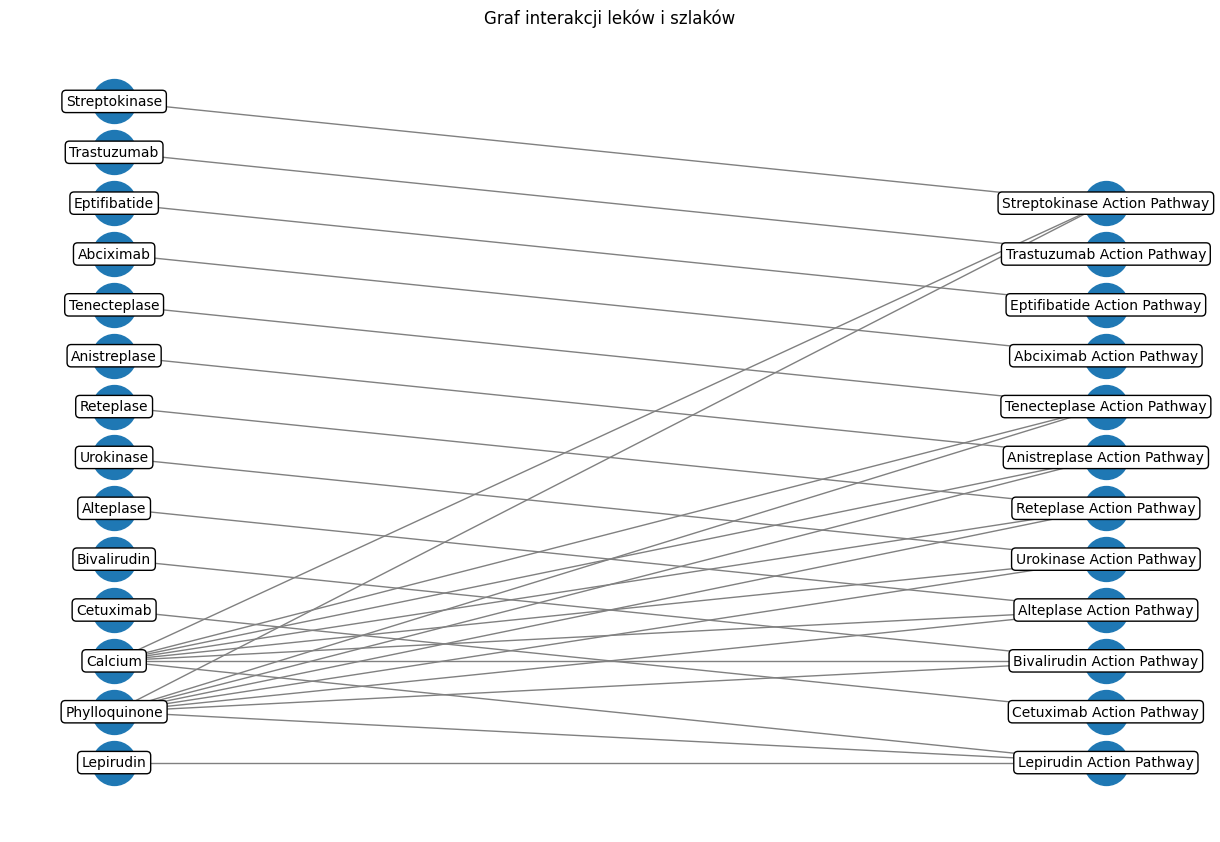

In [20]:
create_pathways_graph(pathways_interaction_df)

# 6) 
Dla każdego leku w bazie danych podać liczbę szlaków, z którymi dany lek wchodzi w
interakcje. Przedstawić wyniki w postaci histogramu z odpowiednio opisanymi osiami.

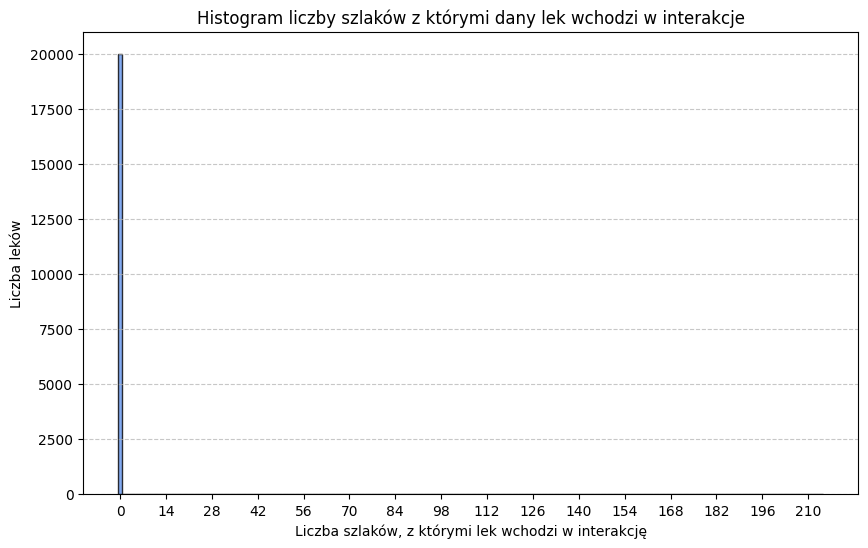

In [21]:
pathway_count_df = create_pathway_count_df(pathways_interaction_df, drugs_df)
plot_pathway_count(pathway_count_df)

In [22]:
pathway_count_df.head()

,drugbank-id,name,pathway-count
0,DB00001,Lepirudin,195
1,DB00002,Cetuximab,209
2,DB00003,Dornase alfa,0
3,DB00004,Denileukin diftitox,0
4,DB00005,Etanercept,0


# 7) 
Utworzyć ramkę danych zawierającą informacje o białkach, z którymi poszczególne leki
wchodzą w interakcje. Białka te to tzw. targety. Ramka danych powinna zawierać
przynajmniej DrugBank ID targetu, informację o zewnętrznej bazie danych (ang. *source*,
np. Swiss-Prot), identyfikator w zewnętrznej bazie danych, nazwę polipeptydu, nazwę genu
kodującego polipeptyd, identyfikator genu GenAtlas ID, numer chromosomu, umiejscowienie
w komórce. (4 pkt)

In [23]:
targets_df = extract_targets(xml_file, namespace)

In [24]:
targets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50693 entries, 0 to 50692
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   drug-drugbank-id     50693 non-null  object
 1   drug-name            50693 non-null  object
 2   target-drugbank-id   50693 non-null  object
 3   source               50693 non-null  object
 4   external-id          50693 non-null  object
 5   polypepetide-name    50693 non-null  object
 6   gene-name            50693 non-null  object
 7   gene-genatlas-id     48880 non-null  object
 8   chromosome-location  49871 non-null  object
 9   cellular-location    50506 non-null  object
dtypes: object(10)
memory usage: 3.9+ MB


In [25]:
targets_df.tail()

,drug-drugbank-id,drug-name,target-drugbank-id,source,external-id,polypepetide-name,gene-name,gene-genatlas-id,chromosome-location,cellular-location
50688,19895,Gemtuzumab ozogamicin,BE0000910,Swiss-Prot,P01023,Alpha-2-macroglobulin,A2M,A2M,12,Secreted
50689,19896,Pegaspargase,BE0000033,Swiss-Prot,P06213,Insulin receptor,INSR,INSR,19,Cell membrane
50690,19896,Pegaspargase,BE0000858,Swiss-Prot,P08069,Insulin-like growth factor 1 receptor,IGF1R,IGF1R,15,Cell membrane
50691,19897,Pegaspargase,BE0000211,Swiss-Prot,P00747,Plasminogen,PLG,PLG,6,Secreted
50692,19897,Pegaspargase,BE0000928,Swiss-Prot,P25116,Proteinase-activated receptor 1,F2R,F2R,5,Cell membrane


# 8) 
Utworzyć wykres kołowy prezentujący procentowe występowanie targetów w różnych
częściach komórki. (4 pkt)

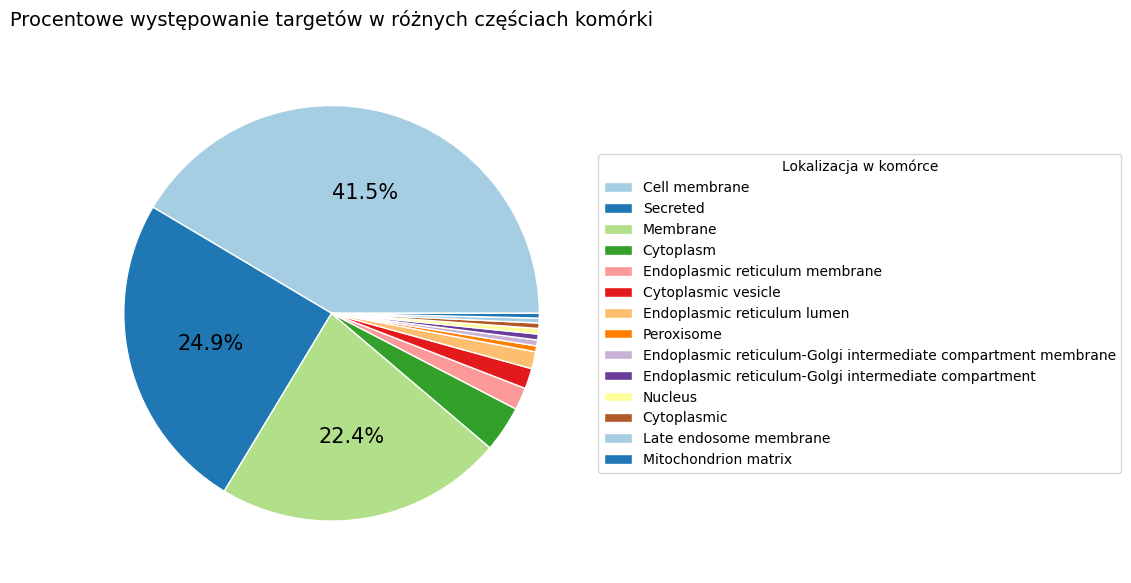

In [26]:
plot_cellural_location(targets_df)

# 9) 
Utworzyć ramkę danych, pokazującą ile leków zostało zatwierdzonych, wycofanych, ile
jest w fazie eksperymentalnej (ang. *experimental* lub *investigational*) i dopuszczonych w
leczeniu zwierząt. Przedstawić te dane na wykresie kołowym. Podać liczbę zatwierdzonych
leków, które nie zostały wycofane. (4 pkt)

In [27]:
drug_status_df = extract_drug_status(xml_file, namespace)

In [28]:
drug_status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   drugbank-id   20000 non-null  object
 1   approved      20000 non-null  bool  
 2   withdrawn     20000 non-null  bool  
 3   experimental  20000 non-null  bool  
 4   veterinary    20000 non-null  bool  
dtypes: bool(4), object(1)
memory usage: 234.5+ KB


In [29]:
drug_status_df.tail()

,drugbank-id,approved,withdrawn,experimental,veterinary
19995,19895,True,False,True,False
19996,19896,True,False,False,False
19997,19897,True,False,True,False
19998,19898,True,False,False,False
19999,19899,True,False,False,False


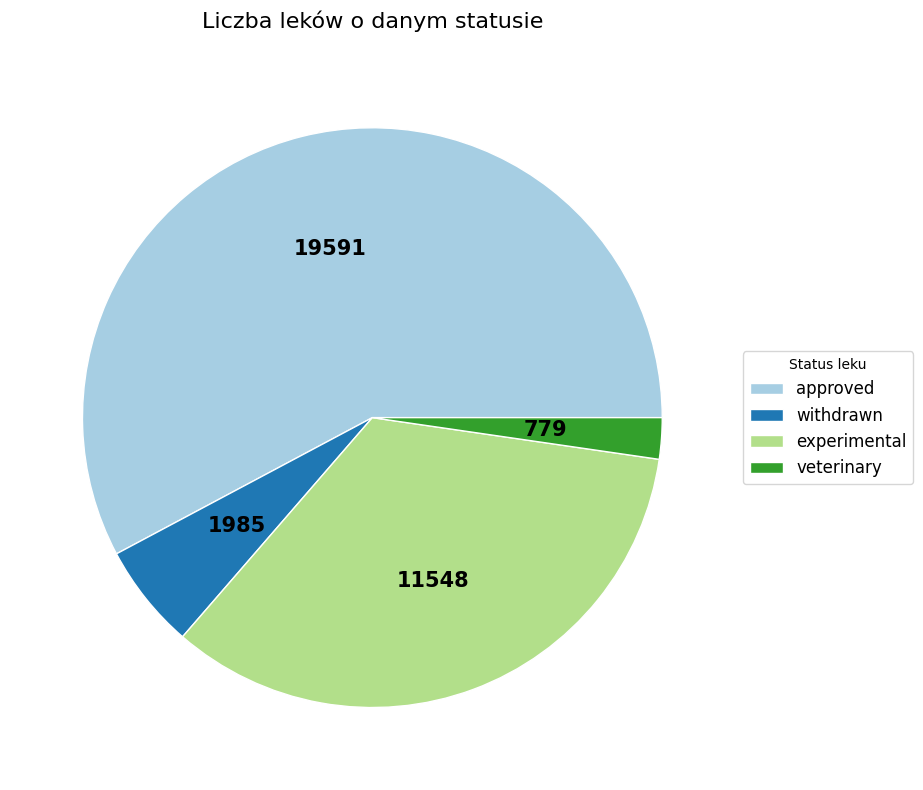

In [30]:
plot_drug_status(drug_status_df)

# 10) 
Utworzyć ramkę danych zawierającą informacje dotyczące potencjalnych interakcji
danego leku z innymi lekami. (4 pkt)

In [31]:
interaction_df = extract_interactions(xml_file, namespace)

In [32]:
interaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127775 entries, 0 to 10127774
Data columns (total 2 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   drugbank-id              object
 1   interaction-drugbank-id  object
dtypes: object(2)
memory usage: 154.5+ MB


In [33]:
interaction_df.tail()

,drugbank-id,interaction-drugbank-id
10127770,19899,DB14506
10127771,19899,DB00529
10127772,19899,DB00363
10127773,19899,DB00107
10127774,19899,DB01161


# 11)

Opracować według własnego pomysłu graficzną prezentację zawierającą informacje o
konkretnym genie lub genach, substancjach leczniczych, które z tym genem/genami
wchodzą w interakcje, oraz produktach farmaceutycznych, które zawierają daną substancję
leczniczą. Wybór dotyczący tego, czy prezentacja graficzna jest realizowana dla
konkretnego genu, czy wszystkich genów jednocześnie pozostawiamy Państwa decyzji.
Przy dokonywaniu wyboru należy kierować się czytelnością i atrakcyjnością prezentacji
graficznej. (7 pkt)

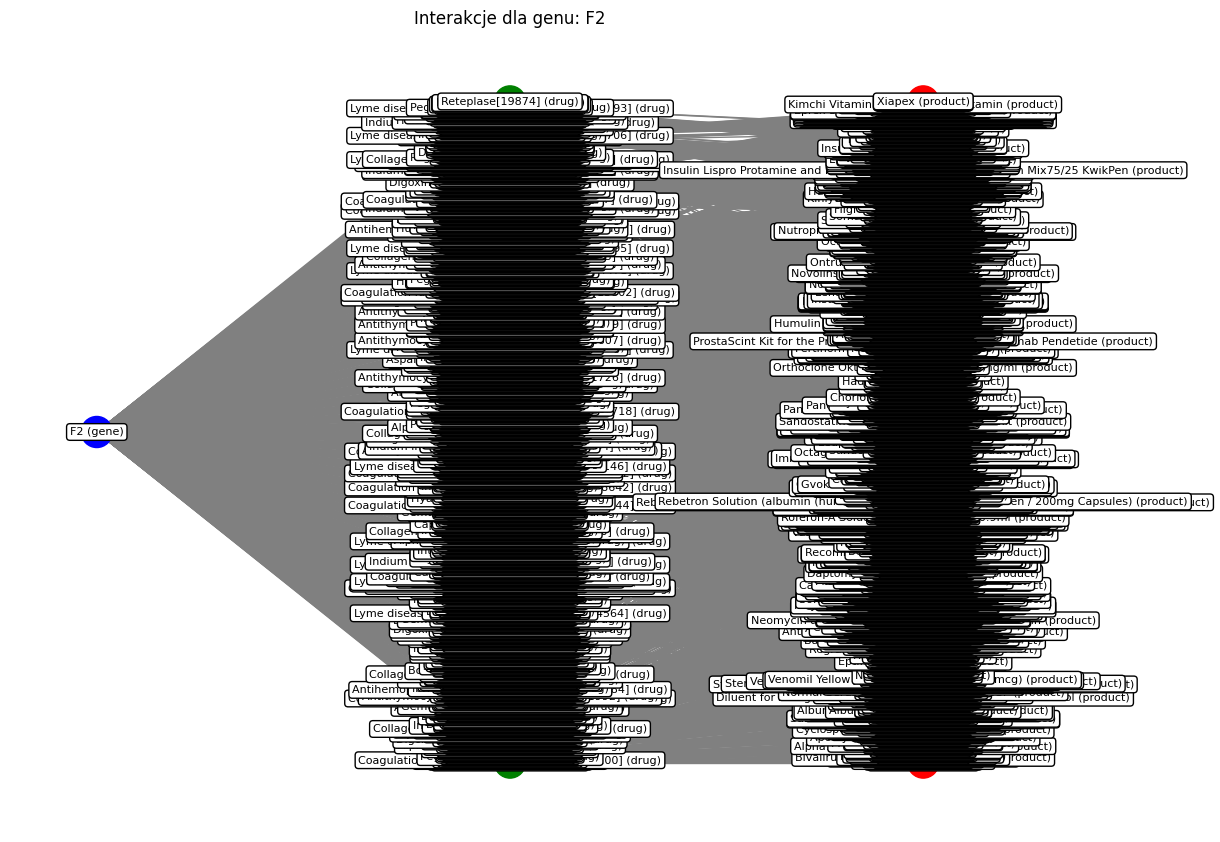

In [34]:
draw_gene_interaction_network(targets_df, products_info, "F2")

# 12) 
Zaproponować własną analizę i prezentację danych dotyczących leków. Można w tym
celu pozyskiwać dodatkowe informacje z innych biomedycznych i bioinformatycznych baz
danych dostępnych online. Należy jednak upewnić się, czy dana baza danych pozwala na
zautomatyzowane pobieranie danych przez program. Na przykład baza danych GeneCards
wprost tego zabrania, co zostało na czerwono podkreślone na tej stronie. Przykładowe bazy
danych to: UniProt (https://www.uniprot.org/), Small Molecule Pathway Database
(https://smpdb.ca/), The Human Protein Atlas (https://www.proteinatlas.org/). (7 pkt)

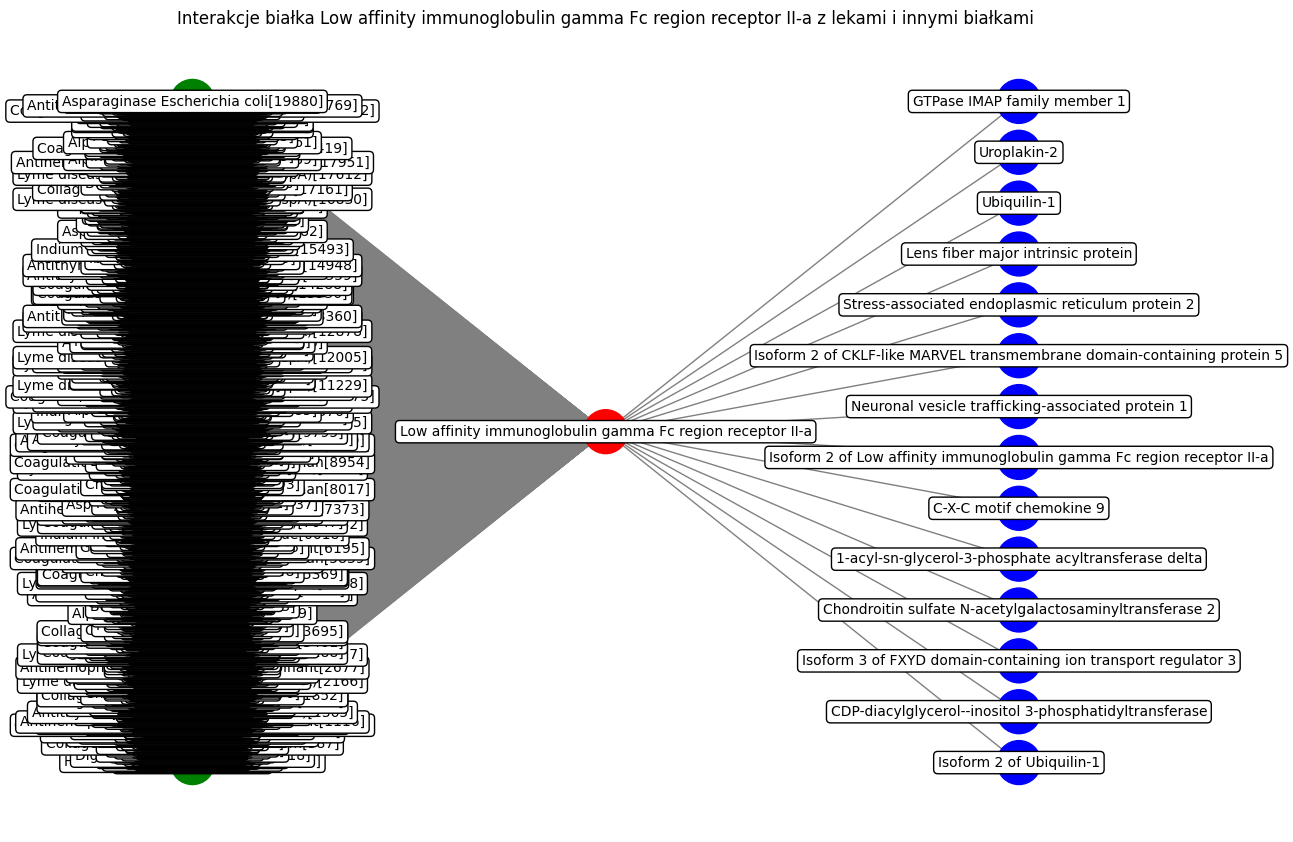

In [35]:
draw_protein_interactions("P12318", targets_df)